# sentiment

### per character

In [3]:
import json
import collections
from nltk.stem import WordNetLemmatizer 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import itertools 

In [4]:
colors = ["#708ea2", "#515c68", "#874d28", "#5d5933", "#1e3b23", "#393835"]


# font = {'family' : 'DejaVu Sans',
#         'weight' : 'bold',
#         'size'   : 40}


plt.rcParams['font.size'] = 40
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

In [5]:
CharacterDialogue = {}

# Opening JSON file
with open('characterDialogue.json', encoding="utf8") as json_file:
    data = json.load(json_file)
    CharactersDialogue = data

In [6]:
lemmatizer = WordNetLemmatizer()

def preppData(CharacterText):
    preppedText = []

    for sentance in CharacterText:
        #tokenize and to lowercase
        tokenizedSentance = nltk.word_tokenize(sentance.lower())
        for token in tokenizedSentance:
            #lemmatize words
            preppedText.append(lemmatizer.lemmatize(token))

    return preppedText

In [7]:

analyzer = SentimentIntensityAnalyzer()
scores = []

#A function for calculating  Vader sentiment scores
def vaderSentimentScores(preppedCharData):
    
    for sentence in preppedCharData:
        if sentence:
            vs = analyzer.polarity_scores(sentence)
            scores.append(vs['compound'])

    scoreLen = len(scores)
    scoreSum = sum(scores)
    scoreAvg = scoreSum /scoreLen

    return scoreAvg

vaderSentScores = {}
allSentScores = {}

for key, value in CharactersDialogue.items():

    if len(value) > 5:
        sentScore = vaderSentimentScores(value)
        vaderSentScores[key] = sentScore

for key, value in CharactersDialogue.items():
    if len(value) > 1:
        sentScore = vaderSentimentScores(value)
        allSentScores[key] = sentScore



print("All Vader sentiment scores have been successfully calculated!")

All Vader sentiment scores have been successfully calculated!


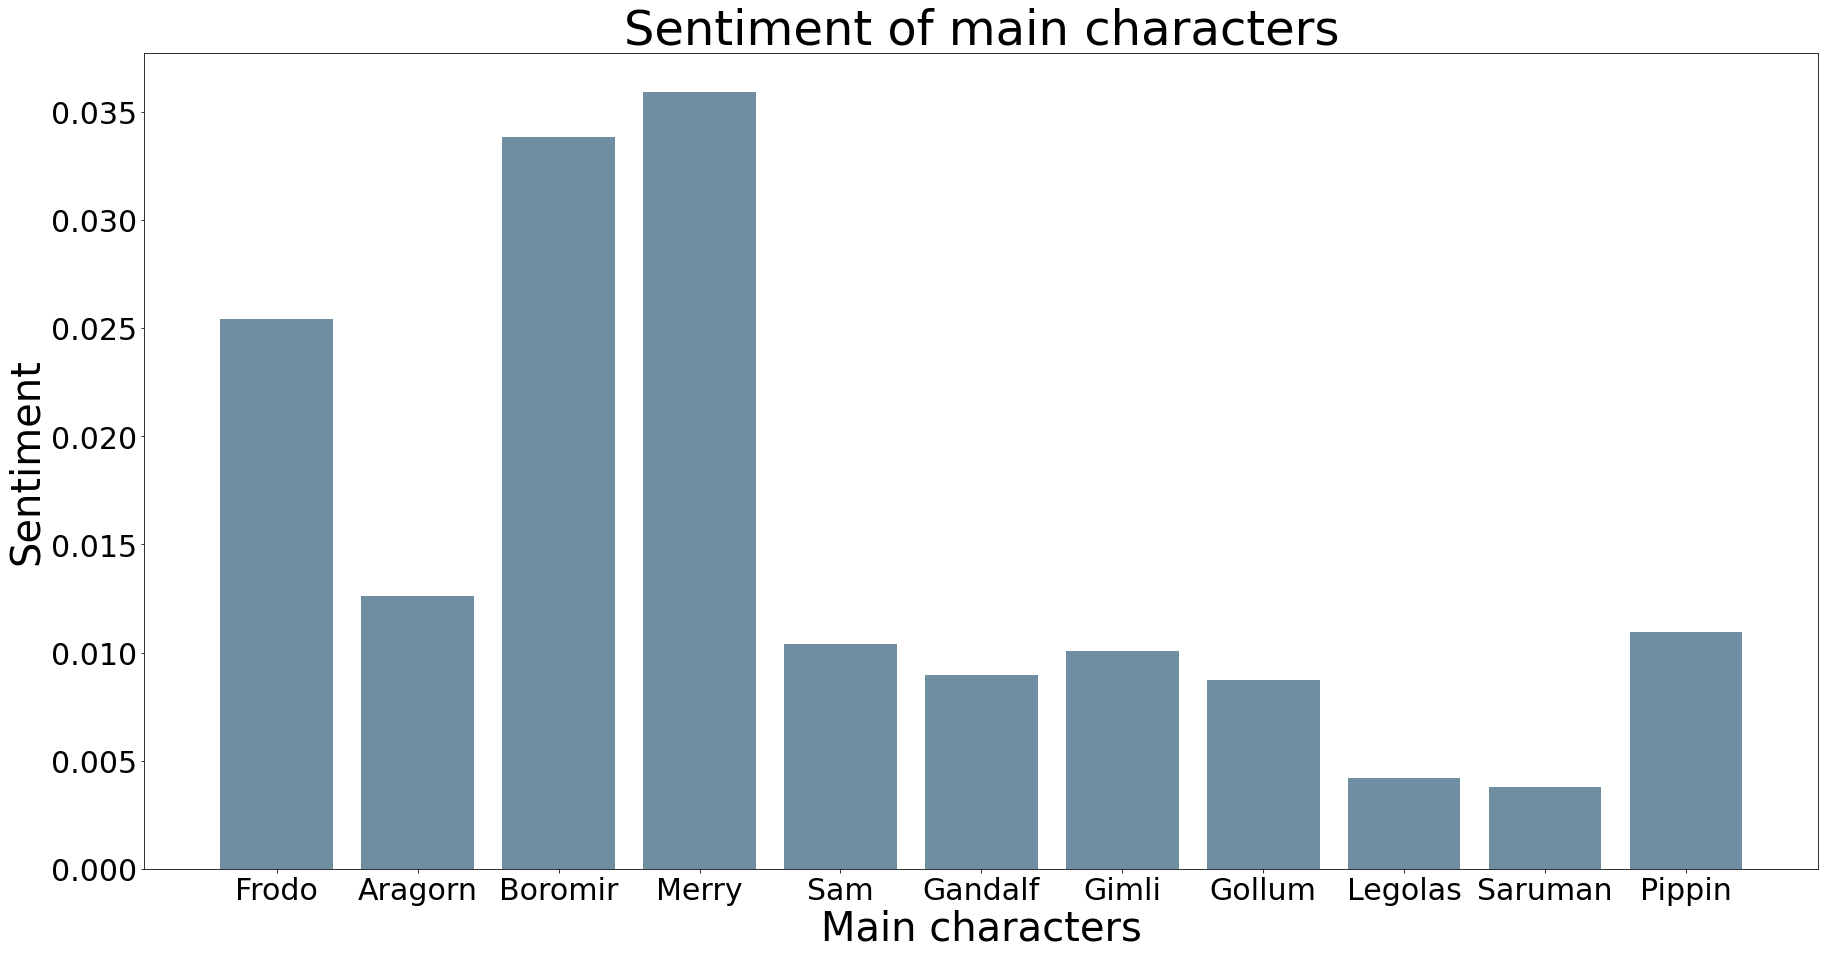

In [8]:
chosenCharacters = ['frodo baggins','aragorn ii elessar','boromir','meriadoc brandybuck','samwise gamgee','gandalf','gimli','gollum','legolas','saruman','peregrin took']
characterNames = ['Frodo','Aragorn','Boromir','Merry','Sam','Gandalf','Gimli','Gollum','Legolas','Saruman','Pippin']

chosenCharList = []

for scores in chosenCharacters:
    chosenCharList.append(vaderSentScores[scores])


fig,ax = plt.subplots(figsize=(30,15))
bars = ax.bar(characterNames,chosenCharList,align = 'center',color = '#708ea2')
ax.set_xlabel('Main characters')
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment of main characters')

# for i in range(len(bars)):
#    bars[i].set_color(colors[i])
#ax.set_xscale('log')
plt.show()



In [9]:
#Vader
sortedVaderScores = sorted(vaderSentScores.items(), key=lambda x: x[1])

#p#rint(sortedVaderScores)

print("10 happiest characters by using Vader: ")
VSort = []

for i in sortedVaderScores[-10:]:
    VSort.append(i[0])

VSort.reverse()
print(VSort)

print("10 saddest characters by using Vader: ")
VSortSad = []

for i in sortedVaderScores[0:10]:
    VSortSad.append(i[0])

print(VSortSad)

10 happiest characters by using Vader: 
['bilbo baggins', 'barliman butterbur', 'meriadoc brandybuck', 'boromir', 'arwen', 'frodo baggins', 'elrond', 'galadriel', 'aragorn ii elessar', 'peregrin took']
10 saddest characters by using Vader: 
['shagrat', 'men', 'leowyn', 'ring', 'hobbits', 'gothmog (lieutenant of morgul)', 'orcs', 'saruman', 'legolas', 'gorbag']


problems

SHould we exclude people with under five lines???!? 

In [10]:
print(sortedVaderScores)
print(len(sortedVaderScores))

[('shagrat', 0.0025009817045961737), ('men', 0.002558160621761669), ('leowyn', 0.0025759623992838068), ('ring', 0.0028849381625441805), ('hobbits', 0.0028926040744021364), ('gothmog (lieutenant of morgul)', 0.0030147219690063926), ('orcs', 0.003528815789473695), ('saruman', 0.003785823529411782), ('legolas', 0.0042032082324455385), ('gorbag', 0.004644699403396066), ('grima wormtongue', 0.004790478380864779), ('theoden', 0.00535581285444236), ('faramir', 0.00553385233550981), ('haleth (son of hama)', 0.0055759323719542665), ('gamling', 0.005760169491525439), ('eowyn', 0.005921443298969089), ('eomer', 0.006498526315789493), ('ugluk', 0.006583944315545258), ('treebeard', 0.006593206142391824), ('gollum', 0.008714654088050335), ('denethor ii', 0.00888653846153848), ('gandalf', 0.008969125475285195), ('gimli', 0.010048319327731113), ('samwise gamgee', 0.010415854823304706), ('witch-king of angmar', 0.01066791938997823), ('peregrin took', 0.010941060688901055), ('aragorn ii elessar', 0.01259

## Races

Remember to add to races the extra dialogues!!!

In [11]:
# Opening JSON file
with open('races.json', encoding="utf8") as json_file:
    data = json.load(json_file)
    races = data

In [12]:
raceScores = {}
charScores = []
raceSentiment = {}


#print(allSentScores)
for key, value in races.items():
    #print(value)
    if len(value) > 1:
        for char in value:
            #print(char)
            if char in allSentScores:
                charScores.append(allSentScores[char])


    scoreLen = len(charScores)
    scoreSum = sum(charScores)
    scoreAvg = scoreSum /scoreLen
    raceSentiment[key] = scoreAvg


print(raceSentiment)        


{'Men': 0.005079702248356136, 'Half-elven': 0.005311052636517483, 'Elves': 0.0058150110735114835, 'Ainur': 0.005547261978092451, 'Hobbits': 0.005697396679110229, 'Dwarves': 0.005694694181136844, 'Unknown': 0.0055659540186039315, 'Orcs': 0.005511083071607913, 'Spiders': 0.005511083071607913, 'Great Eagles': 0.005511083071607913, 'Uruk-hai': 0.005511083071607913, 'Ents': 0.005486418175731179, 'Black Uruks': 0.005443009924045634}


OrderedDict([('Men', 0.005079702248356136), ('Half-elven', 0.005311052636517483), ('Black Uruks', 0.005443009924045634), ('Ents', 0.005486418175731179), ('Orcs', 0.005511083071607913), ('Spiders', 0.005511083071607913), ('Great Eagles', 0.005511083071607913), ('Uruk-hai', 0.005511083071607913), ('Ainur', 0.005547261978092451), ('Unknown', 0.0055659540186039315), ('Dwarves', 0.005694694181136844), ('Hobbits', 0.005697396679110229), ('Elves', 0.0058150110735114835)])


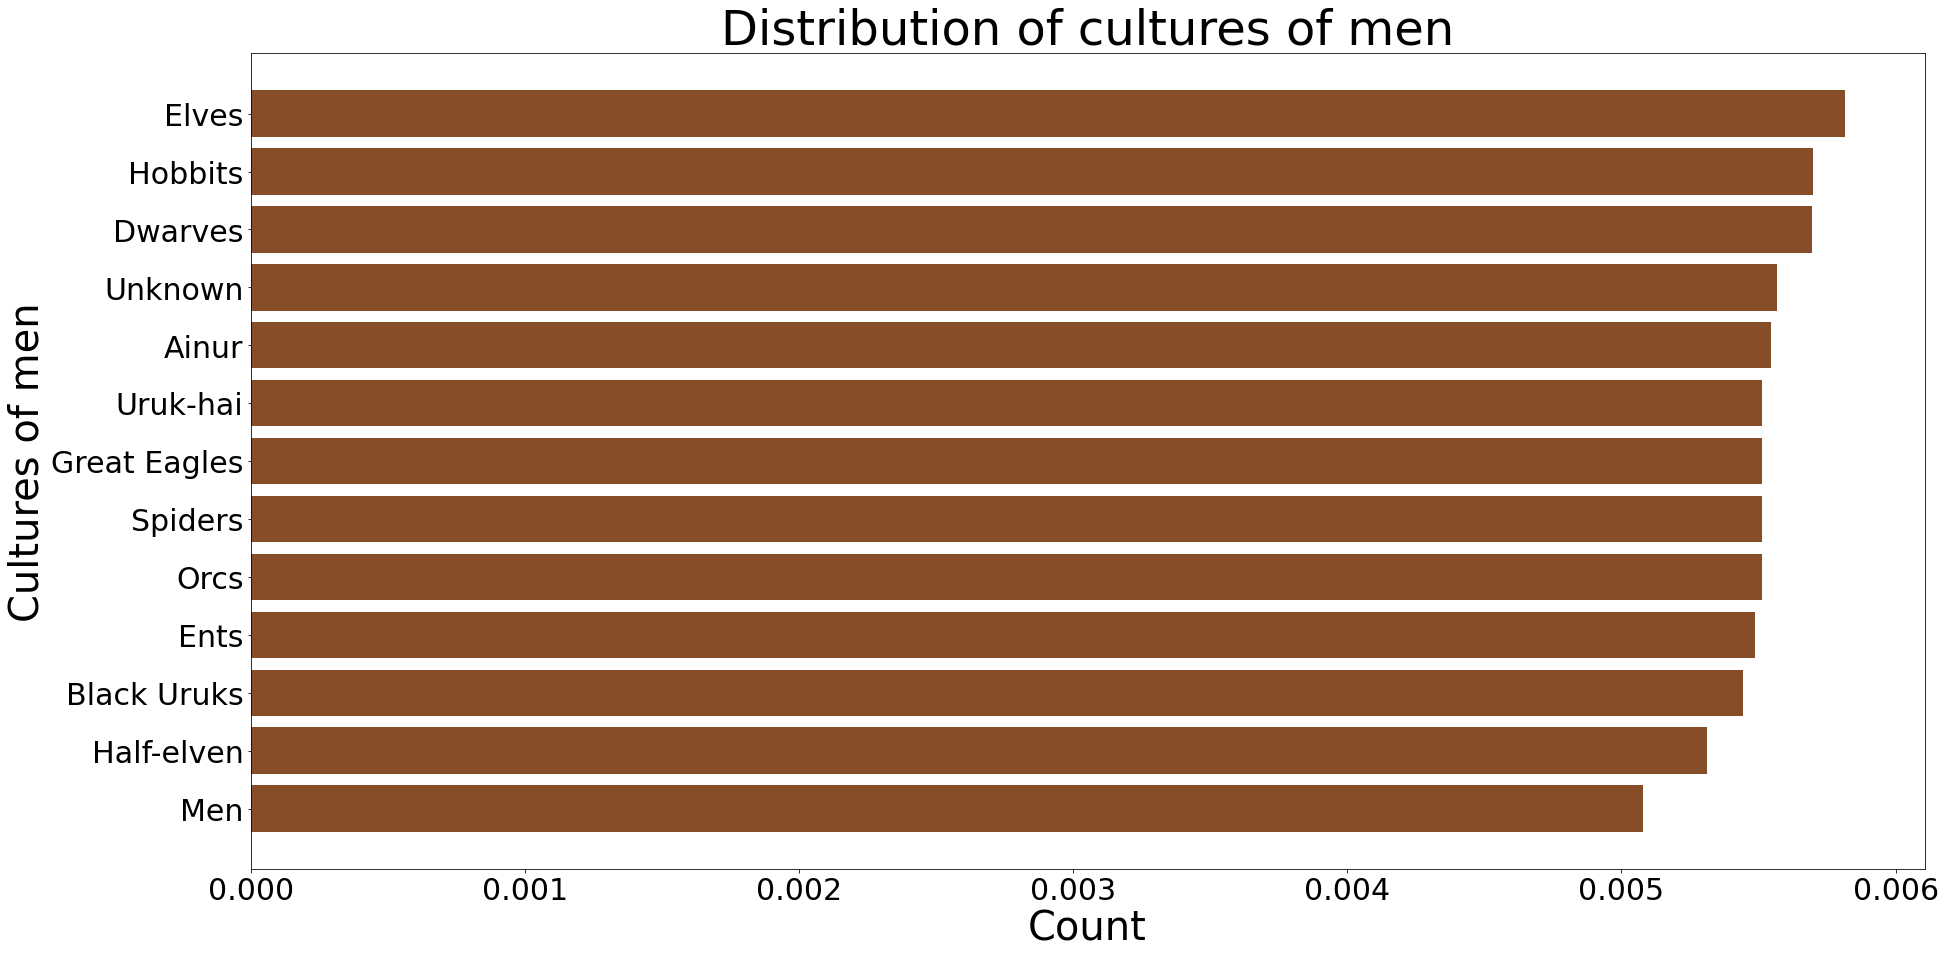

In [13]:
import collections
sortedRaceSentiment = collections.OrderedDict(raceSentiment.items())

sortedRaceSentiment = collections.OrderedDict(sorted(raceSentiment.items(), key=lambda t: t[1]))
print(sortedRaceSentiment)


fig,ax = plt.subplots(figsize=(30,15))
bars = ax.barh(list(sortedRaceSentiment.keys()),sortedRaceSentiment.values(),align = 'center',color = '#874d28')
ax.set_xlabel('Count')
ax.set_ylabel('Cultures of men')
ax.set_title('Distribution of cultures of men')

# for i in range(len(bars)):
#    bars[i].set_color(colors[i])
#ax.set_xscale('log')
plt.show()

## Cultures of men

In [14]:
with open('culturesOfMen.json', encoding="utf8") as json_file:
    data = json.load(json_file)
    culturesOfMen = data

In [15]:
menScores = []
menSentiment = {}

#print(allSentScores)
for key, value in culturesOfMen.items():
    #print(value)
    for char in value:
        #print(char)
        if char in allSentScores:
            menScores.append(allSentScores[char])


    scoreLen = len(menScores)
    scoreSum = sum(menScores)
    scoreAvg = scoreSum /scoreLen
    menSentiment[key] = scoreAvg


print(menSentiment)

{'Dúnedain of Arnor': 0.0034356579984239667, 'House of Isildur': 0.0034356579984239667, 'House of Telcontar': 0.0034356579984239667, 'Unkown': 0.0038748336878828746, 'Dúnedain': 0.0038748336878828746, 'The Faithful': 0.0038748336878828746, 'Númenoreans': 0.0038748336878828746, 'Lords of Andúnië': 0.0038748336878828746, 'Andúnië': 0.0038748336878828746, 'Men of Bree': 0.005302888392801428, 'Men of Gondor': 0.005495918955050568, 'House of Húrin': 0.005703700076947715, 'Rohirrim': 0.005316410322358742, 'House of Eorl': 0.005316410322358742, 'Númenóreans': 0.005376969568177054, 'Nazgûl': 0.00543040419684027, 'Black Númenórean': 0.005285463696783726, 'Lake-town': 0.005285463696783726, 'Easterlings': 0.005285463696783726, 'John Leigh': 0.005285463696783726, 'Haradrim': 0.005285463696783726, 'Dunlendings': 0.005285463696783726, 'Oathbreakers': 0.005167049147834049}


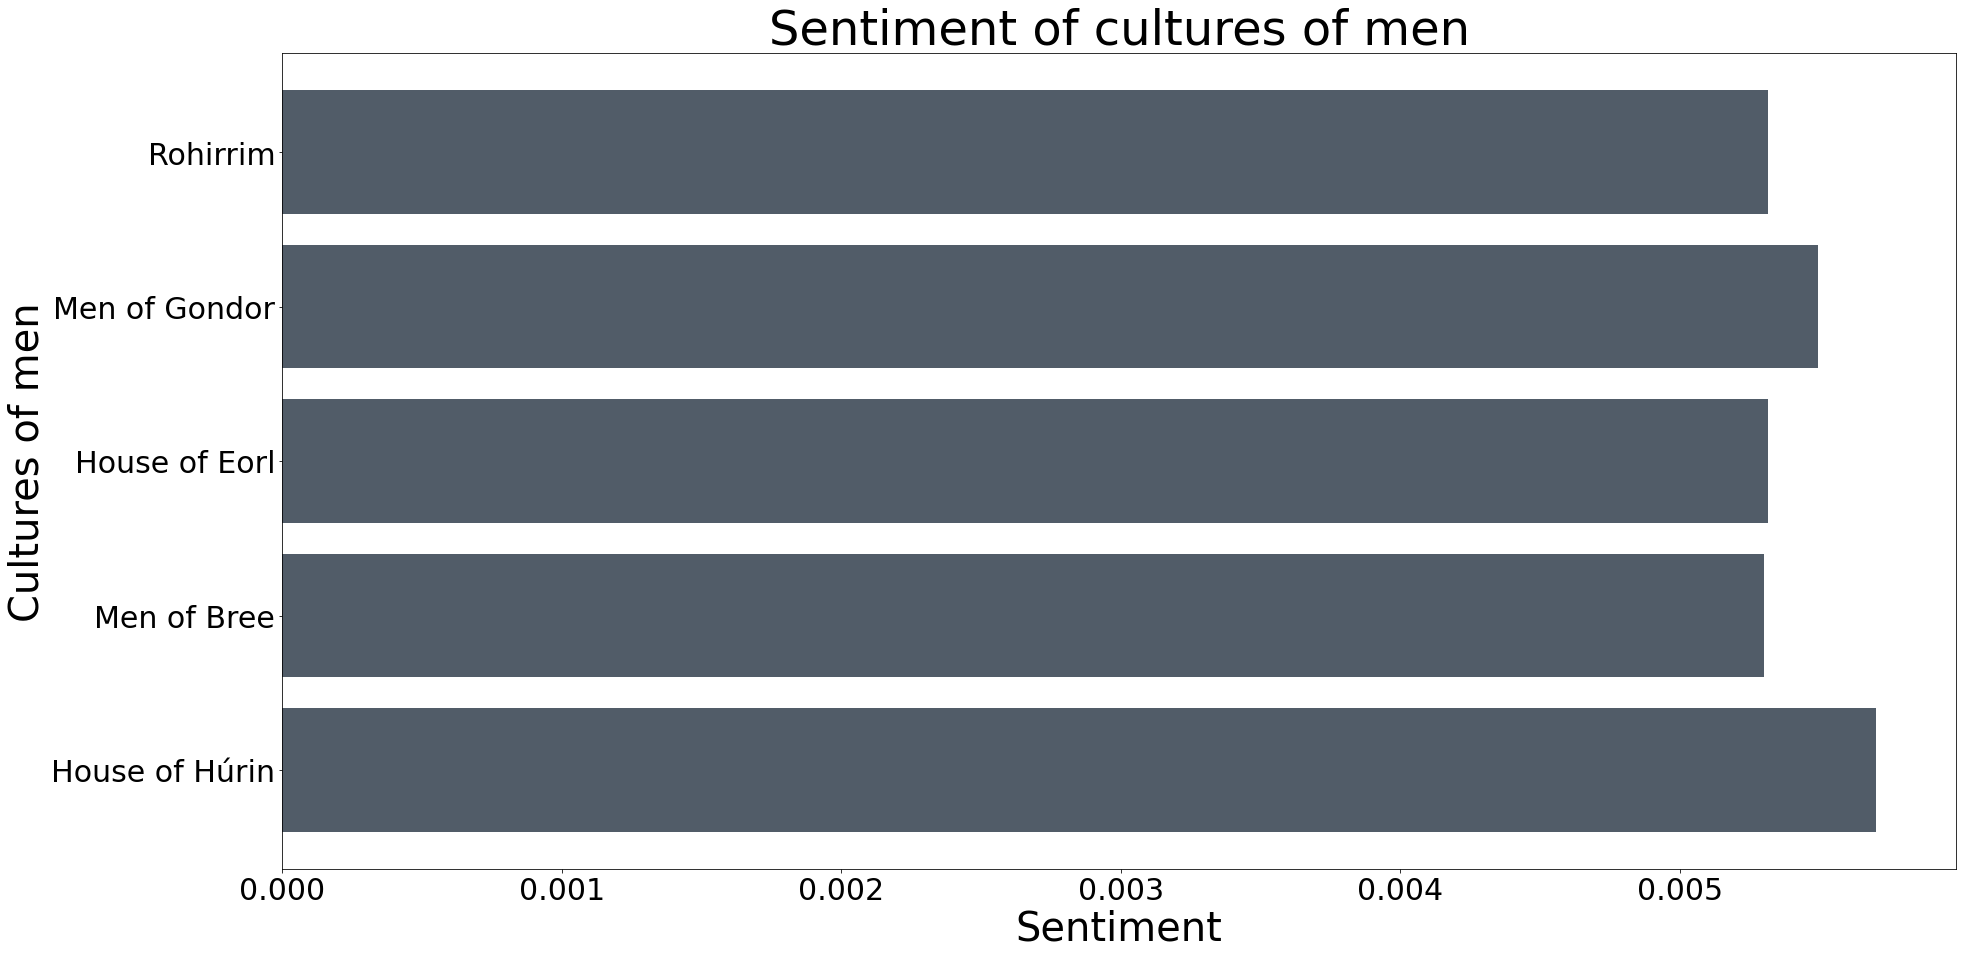

In [16]:
#sortedRaceSentiment = collections.OrderedDict(raceSentiment.items())
#sortedRaceSentiment = collections.OrderedDict(sorted(raceSentiment.items(), key=lambda t: t[1]))
chosenCharacters = ['House of Húrin','Men of Bree','House of Eorl','Men of Gondor','Rohirrim']

charList = []

for scores in chosenCharacters:
    charList.append(menSentiment[scores])

fig,ax = plt.subplots(figsize=(30,15))
bars = ax.barh(chosenCharacters,charList,align = 'center',color = '#515c68')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Cultures of men')
ax.set_title('Sentiment of cultures of men')

# for i in range(len(bars)):
#    bars[i].set_color(colors[i])
#ax.set_xscale('log')
plt.show()

In [21]:
with open("transcripts/" + 'Fotr_parsed_cleaned2.txt' ,encoding='utf-8') as f:
    fellowshipScript = f.read()

with open("transcripts/" + '2t_parsed_and_cleaned.txt' ,encoding='utf-8') as f:
    towersScript = f.read()

with open("transcripts/" + 'RotK_parsed_and_cleaned.txt' ,encoding='utf-8') as f:
    kingScript = f.read()


In [22]:

analyzer = SentimentIntensityAnalyzer()
scores = []

#A function for calculating  Vader sentiment scores
def testvaderSentimentScores(preppedCharData):
    
    for sentence in preppedCharData:
        if sentence:
            vs = analyzer.polarity_scores(sentence)
            scores.append(vs['compound'])

    scoreLen = len(scores)
    scoreSum = sum(scores)
    scoreAvg = scoreSum /scoreLen

    return scoreAvg

# vaderSentScores = {}
# allSentScores = {}


scripts = [fellowshipScript, towersScript, kingScript]
averageMovieSentiment = []
#print(fellowshipScript)
for script in scripts:
    lines = script.splitlines()
    averageMovieSentiment.append(testvaderSentimentScores(lines))



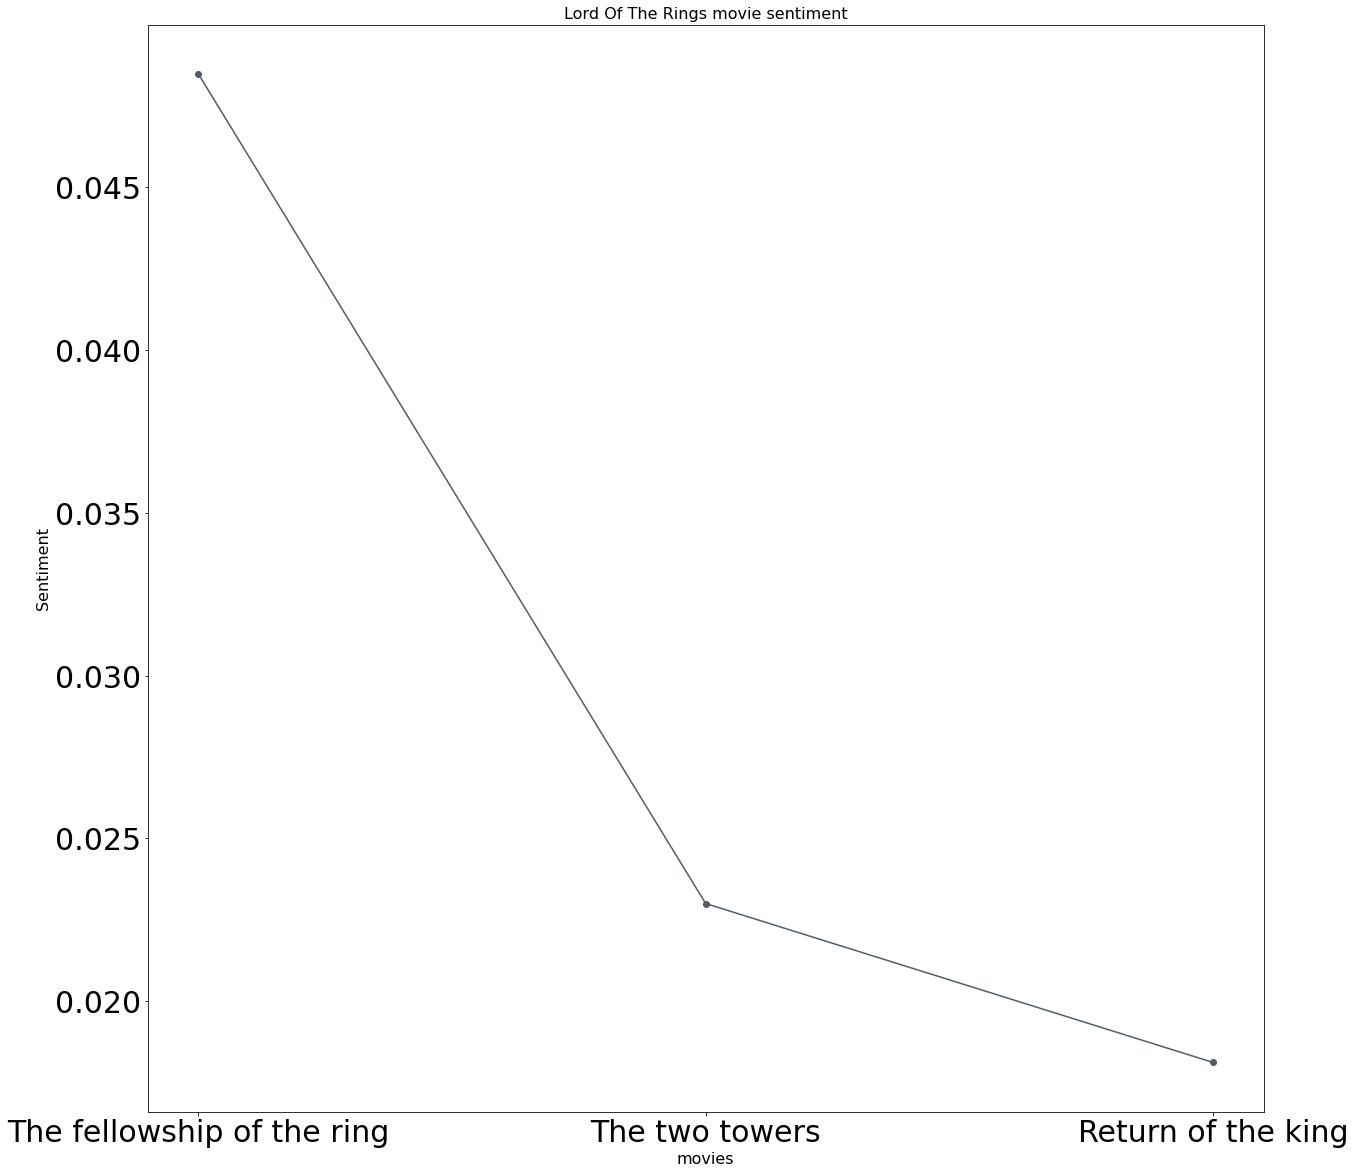

In [23]:
fig, axs = plt.subplots(figsize=(20,20))
# fig.suptitle('Vader Sentimental analysis')
title = ["The fellowship of the ring", "The two towers", "Return of the king"]


axs.plot(title, averageMovieSentiment, 'o-', color="#515c68")
axs.set_title('Lord Of The Rings movie sentiment', fontsize=16)
axs.set_ylabel('Sentiment', fontsize=16)
axs.set_xlabel('movies', fontsize=16)


# plt.axhline(y=0, color='black', linestyle='-')

# # Finding indexes to create horizontal lines
# horizontal = 0
# # The [:-1] is only used to get rid of the a horizontal line for the last book
# for book in books[:-1]:
#     horizontal = book['nr_of_chapters'] + horizontal
#     plt.axvline(x=horizontal)
    
plt.show()

Community sentiment